In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [13]:
df=pd.read_csv(r"../data/attrition_data.csv")
df.drop(['TERMINATION_YEAR'], axis = 1, inplace=True)
df.drop(['EMP_ID'], axis = 1, inplace=True)
df.drop(['ANNUAL_RATE'], axis = 1, inplace=True)
df.drop(['REFERRAL_SOURCE'], axis = 1, inplace=True)
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [14]:
x=df.drop(['STATUS'], axis=1)
y=df['STATUS']

In [15]:
x = pd.get_dummies(x, columns=['ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'HIRE_MONTH', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'JOB_GROUP'])

In [16]:
to_be_label_encoded = ['JOBCODE', 'JOB_SATISFACTION', 'PERFORMANCE_RATING','EDUCATION_LEVEL']
label_encoder = LabelEncoder()
for column in to_be_label_encoded:
    x[column] = label_encoder.fit_transform(x[column])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [18]:
parameters = {"learning_rate": [0.1,0.05],"max_depth": [5,10],'loss_function':['Logloss', 'CrossEntropy'],"n_estimators":[100,200]}


cat_model = CatBoostClassifier(random_state=42)


gridsearchcat  = GridSearchCV(cat_model, parameters,cv=4,verbose=3)

#run the grid search
gridsearchcat.fit(x_train, y_train)

y_pred = gridsearchcat.predict(x_test)
# print(gridsearchcat.best_params_)
# print(accuracy_score(y_pred,y_test))


Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] learning_rate=0.1, loss_function=Logloss, max_depth=5, n_estimators=100 
0:	learn: 0.6784470	total: 14.4ms	remaining: 1.43s
1:	learn: 0.6678647	total: 22.9ms	remaining: 1.12s
2:	learn: 0.6588979	total: 28ms	remaining: 906ms
3:	learn: 0.6496910	total: 34.4ms	remaining: 827ms
4:	learn: 0.6437098	total: 39.8ms	remaining: 757ms
5:	learn: 0.6404131	total: 42.6ms	remaining: 667ms
6:	learn: 0.6330090	total: 45.1ms	remaining: 599ms
7:	learn: 0.6279763	total: 47.3ms	remaining: 544ms
8:	learn: 0.6236279	total: 49.5ms	remaining: 500ms
9:	learn: 0.6192291	total: 51.5ms	remaining: 464ms
10:	learn: 0.6167250	total: 53.5ms	remaining: 433ms
11:	learn: 0.6134355	total: 57.1ms	remaining: 419ms
12:	learn: 0.6098146	total: 60.2ms	remaining: 403ms
13:	learn: 0.6072480	total: 63.2ms	remaining: 388ms
14:	learn: 0.6038039	total: 66.3ms	remaining: 376ms
15:	learn: 0.6001891	total: 69.3ms	remaining: 364ms
16:	learn: 0.5983997	total: 73.2ms	remain

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


50:	learn: 0.5511473	total: 148ms	remaining: 142ms
51:	learn: 0.5501903	total: 152ms	remaining: 140ms
52:	learn: 0.5494742	total: 155ms	remaining: 138ms
53:	learn: 0.5482484	total: 159ms	remaining: 135ms
54:	learn: 0.5465510	total: 161ms	remaining: 132ms
55:	learn: 0.5456399	total: 164ms	remaining: 129ms
56:	learn: 0.5442395	total: 167ms	remaining: 126ms
57:	learn: 0.5435662	total: 170ms	remaining: 123ms
58:	learn: 0.5426833	total: 173ms	remaining: 120ms
59:	learn: 0.5402998	total: 175ms	remaining: 117ms
60:	learn: 0.5396267	total: 177ms	remaining: 113ms
61:	learn: 0.5390533	total: 180ms	remaining: 110ms
62:	learn: 0.5384940	total: 182ms	remaining: 107ms
63:	learn: 0.5378529	total: 184ms	remaining: 104ms
64:	learn: 0.5373397	total: 186ms	remaining: 100ms
65:	learn: 0.5365453	total: 189ms	remaining: 97.1ms
66:	learn: 0.5339278	total: 191ms	remaining: 94ms
67:	learn: 0.5332683	total: 193ms	remaining: 90.8ms
68:	learn: 0.5326579	total: 195ms	remaining: 87.7ms
69:	learn: 0.5318766	total: 1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


28:	learn: 0.5675116	total: 60.6ms	remaining: 148ms
29:	learn: 0.5657891	total: 63.1ms	remaining: 147ms
30:	learn: 0.5645214	total: 66.1ms	remaining: 147ms
31:	learn: 0.5626502	total: 69.7ms	remaining: 148ms
32:	learn: 0.5619057	total: 73.9ms	remaining: 150ms
33:	learn: 0.5607017	total: 77.1ms	remaining: 150ms
34:	learn: 0.5598954	total: 80.1ms	remaining: 149ms
35:	learn: 0.5593678	total: 83.4ms	remaining: 148ms
36:	learn: 0.5564918	total: 86.4ms	remaining: 147ms
37:	learn: 0.5556898	total: 88.8ms	remaining: 145ms
38:	learn: 0.5547252	total: 91ms	remaining: 142ms
39:	learn: 0.5524468	total: 93.1ms	remaining: 140ms
40:	learn: 0.5506172	total: 95.2ms	remaining: 137ms
41:	learn: 0.5488021	total: 97.3ms	remaining: 134ms
42:	learn: 0.5477746	total: 99.3ms	remaining: 132ms
43:	learn: 0.5471974	total: 101ms	remaining: 129ms
44:	learn: 0.5464228	total: 104ms	remaining: 128ms
45:	learn: 0.5453391	total: 107ms	remaining: 125ms
46:	learn: 0.5445988	total: 109ms	remaining: 123ms
47:	learn: 0.54394

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


4:	learn: 0.6436376	total: 11ms	remaining: 208ms
5:	learn: 0.6388080	total: 14.5ms	remaining: 227ms
6:	learn: 0.6343927	total: 17.5ms	remaining: 232ms
7:	learn: 0.6278922	total: 19.6ms	remaining: 226ms
8:	learn: 0.6225777	total: 21.7ms	remaining: 219ms
9:	learn: 0.6171636	total: 23.6ms	remaining: 213ms
10:	learn: 0.6148637	total: 25.7ms	remaining: 208ms
11:	learn: 0.6099968	total: 27.6ms	remaining: 203ms
12:	learn: 0.6078083	total: 29.6ms	remaining: 198ms
13:	learn: 0.6037864	total: 31.6ms	remaining: 194ms
14:	learn: 0.6008297	total: 33.7ms	remaining: 191ms
15:	learn: 0.5965749	total: 36.6ms	remaining: 192ms
16:	learn: 0.5937758	total: 38.7ms	remaining: 189ms
17:	learn: 0.5923889	total: 40.7ms	remaining: 185ms
18:	learn: 0.5893108	total: 42.7ms	remaining: 182ms
19:	learn: 0.5881173	total: 44.7ms	remaining: 179ms
20:	learn: 0.5864228	total: 46.7ms	remaining: 176ms
21:	learn: 0.5852619	total: 48.8ms	remaining: 173ms
22:	learn: 0.5837235	total: 50.8ms	remaining: 170ms
23:	learn: 0.5824809

66:	learn: 0.5321330	total: 146ms	remaining: 71.8ms
67:	learn: 0.5316307	total: 148ms	remaining: 69.6ms
68:	learn: 0.5309975	total: 155ms	remaining: 69.4ms
69:	learn: 0.5301724	total: 158ms	remaining: 67.7ms
70:	learn: 0.5296446	total: 160ms	remaining: 65.4ms
71:	learn: 0.5292283	total: 162ms	remaining: 63ms
72:	learn: 0.5278606	total: 164ms	remaining: 60.7ms
73:	learn: 0.5271116	total: 167ms	remaining: 58.6ms
74:	learn: 0.5264857	total: 169ms	remaining: 56.4ms
75:	learn: 0.5259201	total: 171ms	remaining: 54ms
76:	learn: 0.5255257	total: 173ms	remaining: 51.7ms
77:	learn: 0.5251524	total: 175ms	remaining: 49.4ms
78:	learn: 0.5242084	total: 177ms	remaining: 47ms
79:	learn: 0.5237330	total: 179ms	remaining: 44.8ms
80:	learn: 0.5224409	total: 181ms	remaining: 42.5ms
81:	learn: 0.5215200	total: 183ms	remaining: 40.2ms
82:	learn: 0.5205081	total: 185ms	remaining: 37.9ms
83:	learn: 0.5197430	total: 187ms	remaining: 35.7ms
84:	learn: 0.5188331	total: 189ms	remaining: 33.4ms
85:	learn: 0.51795

138:	learn: 0.4728028	total: 294ms	remaining: 129ms
139:	learn: 0.4719560	total: 297ms	remaining: 127ms
140:	learn: 0.4715268	total: 300ms	remaining: 126ms
141:	learn: 0.4709098	total: 304ms	remaining: 124ms
142:	learn: 0.4704328	total: 306ms	remaining: 122ms
143:	learn: 0.4695020	total: 308ms	remaining: 120ms
144:	learn: 0.4691675	total: 311ms	remaining: 118ms
145:	learn: 0.4683970	total: 313ms	remaining: 116ms
146:	learn: 0.4677612	total: 316ms	remaining: 114ms
147:	learn: 0.4670329	total: 318ms	remaining: 112ms
148:	learn: 0.4664522	total: 320ms	remaining: 109ms
149:	learn: 0.4658432	total: 322ms	remaining: 107ms
150:	learn: 0.4651832	total: 324ms	remaining: 105ms
151:	learn: 0.4648136	total: 327ms	remaining: 103ms
152:	learn: 0.4642019	total: 329ms	remaining: 101ms
153:	learn: 0.4633856	total: 331ms	remaining: 98.8ms
154:	learn: 0.4626472	total: 333ms	remaining: 96.6ms
155:	learn: 0.4619819	total: 335ms	remaining: 94.4ms
156:	learn: 0.4613683	total: 337ms	remaining: 92.3ms
157:	lea

105:	learn: 0.4917887	total: 234ms	remaining: 207ms
106:	learn: 0.4911228	total: 237ms	remaining: 206ms
107:	learn: 0.4900546	total: 240ms	remaining: 204ms
108:	learn: 0.4890211	total: 243ms	remaining: 203ms
109:	learn: 0.4882148	total: 247ms	remaining: 202ms
110:	learn: 0.4868505	total: 250ms	remaining: 201ms
111:	learn: 0.4858671	total: 252ms	remaining: 198ms
112:	learn: 0.4851028	total: 255ms	remaining: 196ms
113:	learn: 0.4843646	total: 257ms	remaining: 194ms
114:	learn: 0.4836686	total: 259ms	remaining: 191ms
115:	learn: 0.4826726	total: 261ms	remaining: 189ms
116:	learn: 0.4819925	total: 263ms	remaining: 186ms
117:	learn: 0.4810966	total: 265ms	remaining: 184ms
118:	learn: 0.4795269	total: 267ms	remaining: 182ms
119:	learn: 0.4784474	total: 269ms	remaining: 179ms
120:	learn: 0.4775660	total: 271ms	remaining: 177ms
121:	learn: 0.4764939	total: 273ms	remaining: 175ms
122:	learn: 0.4759617	total: 275ms	remaining: 172ms
123:	learn: 0.4751534	total: 277ms	remaining: 170ms
124:	learn: 

74:	learn: 0.5296011	total: 161ms	remaining: 268ms
75:	learn: 0.5290679	total: 164ms	remaining: 268ms
76:	learn: 0.5285095	total: 168ms	remaining: 268ms
77:	learn: 0.5280148	total: 171ms	remaining: 267ms
78:	learn: 0.5275227	total: 174ms	remaining: 266ms
79:	learn: 0.5265503	total: 176ms	remaining: 264ms
80:	learn: 0.5259866	total: 178ms	remaining: 261ms
81:	learn: 0.5253316	total: 180ms	remaining: 259ms
82:	learn: 0.5246024	total: 182ms	remaining: 257ms
83:	learn: 0.5238141	total: 184ms	remaining: 255ms
84:	learn: 0.5227624	total: 187ms	remaining: 252ms
85:	learn: 0.5214036	total: 189ms	remaining: 251ms
86:	learn: 0.5202944	total: 191ms	remaining: 249ms
87:	learn: 0.5193032	total: 194ms	remaining: 246ms
88:	learn: 0.5187014	total: 196ms	remaining: 244ms
89:	learn: 0.5180889	total: 198ms	remaining: 241ms
90:	learn: 0.5174127	total: 200ms	remaining: 239ms
91:	learn: 0.5167386	total: 202ms	remaining: 237ms
92:	learn: 0.5157556	total: 204ms	remaining: 235ms
93:	learn: 0.5137868	total: 206

98:	learn: 0.5057904	total: 300ms	remaining: 306ms
99:	learn: 0.5048053	total: 303ms	remaining: 303ms
100:	learn: 0.5035703	total: 306ms	remaining: 300ms
101:	learn: 0.5025736	total: 309ms	remaining: 297ms
102:	learn: 0.5020324	total: 312ms	remaining: 294ms
103:	learn: 0.5013389	total: 314ms	remaining: 290ms
104:	learn: 0.4997735	total: 317ms	remaining: 286ms
105:	learn: 0.4987412	total: 319ms	remaining: 282ms
106:	learn: 0.4978607	total: 321ms	remaining: 279ms
107:	learn: 0.4965247	total: 323ms	remaining: 275ms
108:	learn: 0.4957123	total: 325ms	remaining: 271ms
109:	learn: 0.4950884	total: 327ms	remaining: 268ms
110:	learn: 0.4943783	total: 329ms	remaining: 264ms
111:	learn: 0.4936353	total: 331ms	remaining: 260ms
112:	learn: 0.4926789	total: 333ms	remaining: 257ms
113:	learn: 0.4916038	total: 335ms	remaining: 253ms
114:	learn: 0.4911505	total: 338ms	remaining: 249ms
115:	learn: 0.4903146	total: 340ms	remaining: 246ms
116:	learn: 0.4893693	total: 342ms	remaining: 242ms
117:	learn: 0.

57:	learn: 0.4094196	total: 562ms	remaining: 407ms
58:	learn: 0.4072092	total: 574ms	remaining: 399ms
59:	learn: 0.4038839	total: 586ms	remaining: 391ms
60:	learn: 0.4025936	total: 595ms	remaining: 380ms
61:	learn: 0.4004937	total: 604ms	remaining: 370ms
62:	learn: 0.3986997	total: 614ms	remaining: 360ms
63:	learn: 0.3943280	total: 623ms	remaining: 350ms
64:	learn: 0.3906353	total: 632ms	remaining: 340ms
65:	learn: 0.3894886	total: 642ms	remaining: 331ms
66:	learn: 0.3882964	total: 653ms	remaining: 321ms
67:	learn: 0.3862816	total: 662ms	remaining: 312ms
68:	learn: 0.3852265	total: 672ms	remaining: 302ms
69:	learn: 0.3835512	total: 681ms	remaining: 292ms
70:	learn: 0.3812948	total: 691ms	remaining: 282ms
71:	learn: 0.3802408	total: 703ms	remaining: 273ms
72:	learn: 0.3772353	total: 712ms	remaining: 263ms
73:	learn: 0.3762471	total: 721ms	remaining: 253ms
74:	learn: 0.3734091	total: 733ms	remaining: 244ms
75:	learn: 0.3719606	total: 742ms	remaining: 234ms
76:	learn: 0.3695022	total: 751

15:	learn: 0.5382429	total: 157ms	remaining: 826ms
16:	learn: 0.5337255	total: 167ms	remaining: 816ms
17:	learn: 0.5262268	total: 180ms	remaining: 820ms
18:	learn: 0.5233385	total: 189ms	remaining: 805ms
19:	learn: 0.5197028	total: 198ms	remaining: 793ms
20:	learn: 0.5160070	total: 207ms	remaining: 780ms
21:	learn: 0.5085566	total: 217ms	remaining: 768ms
22:	learn: 0.5057397	total: 226ms	remaining: 758ms
23:	learn: 0.5028042	total: 237ms	remaining: 751ms
24:	learn: 0.4984275	total: 248ms	remaining: 743ms
25:	learn: 0.4949050	total: 256ms	remaining: 730ms
26:	learn: 0.4929867	total: 266ms	remaining: 719ms
27:	learn: 0.4882946	total: 275ms	remaining: 707ms
28:	learn: 0.4849524	total: 285ms	remaining: 698ms
29:	learn: 0.4816048	total: 294ms	remaining: 686ms
30:	learn: 0.4793639	total: 303ms	remaining: 676ms
31:	learn: 0.4775470	total: 314ms	remaining: 667ms
32:	learn: 0.4736099	total: 323ms	remaining: 656ms
33:	learn: 0.4716111	total: 334ms	remaining: 648ms
34:	learn: 0.4669453	total: 343

76:	learn: 0.3744769	total: 783ms	remaining: 234ms
77:	learn: 0.3725833	total: 794ms	remaining: 224ms
78:	learn: 0.3703641	total: 804ms	remaining: 214ms
79:	learn: 0.3689746	total: 816ms	remaining: 204ms
80:	learn: 0.3662888	total: 830ms	remaining: 195ms
81:	learn: 0.3647073	total: 844ms	remaining: 185ms
82:	learn: 0.3634541	total: 854ms	remaining: 175ms
83:	learn: 0.3606269	total: 864ms	remaining: 165ms
84:	learn: 0.3582802	total: 873ms	remaining: 154ms
85:	learn: 0.3553263	total: 883ms	remaining: 144ms
86:	learn: 0.3538510	total: 894ms	remaining: 134ms
87:	learn: 0.3529842	total: 905ms	remaining: 123ms
88:	learn: 0.3506254	total: 913ms	remaining: 113ms
89:	learn: 0.3488403	total: 922ms	remaining: 102ms
90:	learn: 0.3482229	total: 930ms	remaining: 92ms
91:	learn: 0.3456065	total: 939ms	remaining: 81.7ms
92:	learn: 0.3432042	total: 948ms	remaining: 71.4ms
93:	learn: 0.3410682	total: 957ms	remaining: 61.1ms
94:	learn: 0.3386040	total: 966ms	remaining: 50.9ms
95:	learn: 0.3374782	total: 

141:	learn: 0.2640222	total: 1.37s	remaining: 559ms
142:	learn: 0.2621365	total: 1.38s	remaining: 551ms
143:	learn: 0.2603020	total: 1.39s	remaining: 542ms
144:	learn: 0.2591402	total: 1.4s	remaining: 533ms
145:	learn: 0.2565959	total: 1.42s	remaining: 524ms
146:	learn: 0.2546874	total: 1.43s	remaining: 514ms
147:	learn: 0.2539503	total: 1.44s	remaining: 505ms
148:	learn: 0.2526781	total: 1.44s	remaining: 495ms
149:	learn: 0.2517389	total: 1.45s	remaining: 485ms
150:	learn: 0.2499340	total: 1.46s	remaining: 475ms
151:	learn: 0.2485816	total: 1.47s	remaining: 465ms
152:	learn: 0.2482317	total: 1.48s	remaining: 455ms
153:	learn: 0.2470246	total: 1.49s	remaining: 445ms
154:	learn: 0.2457865	total: 1.5s	remaining: 435ms
155:	learn: 0.2441538	total: 1.51s	remaining: 425ms
156:	learn: 0.2424933	total: 1.52s	remaining: 415ms
157:	learn: 0.2421698	total: 1.52s	remaining: 406ms
158:	learn: 0.2409383	total: 1.53s	remaining: 396ms
159:	learn: 0.2399317	total: 1.54s	remaining: 386ms
160:	learn: 0.

100:	learn: 0.3284661	total: 1.16s	remaining: 1.14s
101:	learn: 0.3273889	total: 1.17s	remaining: 1.13s
102:	learn: 0.3242792	total: 1.18s	remaining: 1.11s
103:	learn: 0.3225186	total: 1.19s	remaining: 1.1s
104:	learn: 0.3184541	total: 1.2s	remaining: 1.08s
105:	learn: 0.3173030	total: 1.21s	remaining: 1.07s
106:	learn: 0.3164104	total: 1.22s	remaining: 1.06s
107:	learn: 0.3155960	total: 1.23s	remaining: 1.04s
108:	learn: 0.3145814	total: 1.24s	remaining: 1.03s
109:	learn: 0.3130939	total: 1.25s	remaining: 1.02s
110:	learn: 0.3121909	total: 1.26s	remaining: 1.01s
111:	learn: 0.3096327	total: 1.26s	remaining: 995ms
112:	learn: 0.3076067	total: 1.27s	remaining: 982ms
113:	learn: 0.3064971	total: 1.28s	remaining: 969ms
114:	learn: 0.3042185	total: 1.29s	remaining: 958ms
115:	learn: 0.3036105	total: 1.3s	remaining: 945ms
116:	learn: 0.3008547	total: 1.31s	remaining: 932ms
117:	learn: 0.2986403	total: 1.32s	remaining: 919ms
118:	learn: 0.2969381	total: 1.33s	remaining: 906ms
119:	learn: 0.2

57:	learn: 0.4122788	total: 658ms	remaining: 1.61s
58:	learn: 0.4095132	total: 671ms	remaining: 1.6s
59:	learn: 0.4077566	total: 681ms	remaining: 1.59s
60:	learn: 0.4058092	total: 695ms	remaining: 1.58s
61:	learn: 0.4041865	total: 709ms	remaining: 1.58s
62:	learn: 0.4030369	total: 724ms	remaining: 1.57s
63:	learn: 0.4001702	total: 737ms	remaining: 1.57s
64:	learn: 0.3984830	total: 750ms	remaining: 1.56s
65:	learn: 0.3955599	total: 765ms	remaining: 1.55s
66:	learn: 0.3942270	total: 777ms	remaining: 1.54s
67:	learn: 0.3925185	total: 790ms	remaining: 1.53s
68:	learn: 0.3893799	total: 803ms	remaining: 1.52s
69:	learn: 0.3882911	total: 814ms	remaining: 1.51s
70:	learn: 0.3860134	total: 827ms	remaining: 1.5s
71:	learn: 0.3846033	total: 841ms	remaining: 1.5s
72:	learn: 0.3830829	total: 853ms	remaining: 1.48s
73:	learn: 0.3807131	total: 863ms	remaining: 1.47s
74:	learn: 0.3792518	total: 872ms	remaining: 1.45s
75:	learn: 0.3756512	total: 880ms	remaining: 1.44s
76:	learn: 0.3709595	total: 890ms	

34:	learn: 0.4764215	total: 335ms	remaining: 1.58s
35:	learn: 0.4743625	total: 348ms	remaining: 1.59s
36:	learn: 0.4722145	total: 362ms	remaining: 1.6s
37:	learn: 0.4683268	total: 375ms	remaining: 1.6s
38:	learn: 0.4665164	total: 390ms	remaining: 1.61s
39:	learn: 0.4627444	total: 404ms	remaining: 1.61s
40:	learn: 0.4609681	total: 416ms	remaining: 1.61s
41:	learn: 0.4598843	total: 432ms	remaining: 1.63s
42:	learn: 0.4562028	total: 447ms	remaining: 1.63s
43:	learn: 0.4540812	total: 463ms	remaining: 1.64s
44:	learn: 0.4517534	total: 480ms	remaining: 1.65s
45:	learn: 0.4483295	total: 497ms	remaining: 1.66s
46:	learn: 0.4451955	total: 512ms	remaining: 1.67s
47:	learn: 0.4429203	total: 526ms	remaining: 1.67s
48:	learn: 0.4398218	total: 540ms	remaining: 1.66s
49:	learn: 0.4385248	total: 556ms	remaining: 1.67s
50:	learn: 0.4350457	total: 568ms	remaining: 1.66s
51:	learn: 0.4327993	total: 580ms	remaining: 1.65s
52:	learn: 0.4312589	total: 596ms	remaining: 1.65s
53:	learn: 0.4285121	total: 607ms

31:	learn: 0.5723173	total: 78.9ms	remaining: 168ms
32:	learn: 0.5710152	total: 81.7ms	remaining: 166ms
33:	learn: 0.5696256	total: 84.2ms	remaining: 164ms
34:	learn: 0.5683331	total: 86.6ms	remaining: 161ms
35:	learn: 0.5674456	total: 89.1ms	remaining: 158ms
36:	learn: 0.5666045	total: 91.5ms	remaining: 156ms
37:	learn: 0.5656302	total: 94.3ms	remaining: 154ms
38:	learn: 0.5647265	total: 96.8ms	remaining: 151ms
39:	learn: 0.5635861	total: 99.3ms	remaining: 149ms
40:	learn: 0.5628294	total: 102ms	remaining: 147ms
41:	learn: 0.5618911	total: 105ms	remaining: 144ms
42:	learn: 0.5613424	total: 107ms	remaining: 142ms
43:	learn: 0.5604041	total: 110ms	remaining: 140ms
44:	learn: 0.5580172	total: 112ms	remaining: 137ms
45:	learn: 0.5574690	total: 115ms	remaining: 135ms
46:	learn: 0.5560425	total: 118ms	remaining: 133ms
47:	learn: 0.5550354	total: 120ms	remaining: 130ms
48:	learn: 0.5527886	total: 123ms	remaining: 128ms
49:	learn: 0.5522354	total: 125ms	remaining: 125ms
50:	learn: 0.5511473	t

36:	learn: 0.5654631	total: 94ms	remaining: 160ms
37:	learn: 0.5637597	total: 96.8ms	remaining: 158ms
38:	learn: 0.5627902	total: 99.5ms	remaining: 156ms
39:	learn: 0.5617416	total: 102ms	remaining: 153ms
40:	learn: 0.5604835	total: 105ms	remaining: 151ms
41:	learn: 0.5598924	total: 107ms	remaining: 148ms
42:	learn: 0.5586829	total: 110ms	remaining: 146ms
43:	learn: 0.5571775	total: 114ms	remaining: 144ms
44:	learn: 0.5563416	total: 116ms	remaining: 142ms
45:	learn: 0.5545643	total: 119ms	remaining: 139ms
46:	learn: 0.5540542	total: 121ms	remaining: 136ms
47:	learn: 0.5533652	total: 123ms	remaining: 134ms
48:	learn: 0.5528887	total: 126ms	remaining: 131ms
49:	learn: 0.5523582	total: 129ms	remaining: 129ms
50:	learn: 0.5515945	total: 131ms	remaining: 126ms
51:	learn: 0.5508894	total: 134ms	remaining: 123ms
52:	learn: 0.5489528	total: 136ms	remaining: 121ms
53:	learn: 0.5481814	total: 139ms	remaining: 118ms
54:	learn: 0.5474108	total: 141ms	remaining: 116ms
55:	learn: 0.5468360	total: 14

49:	learn: 0.5522354	total: 124ms	remaining: 371ms
50:	learn: 0.5511473	total: 127ms	remaining: 371ms
51:	learn: 0.5501903	total: 129ms	remaining: 368ms
52:	learn: 0.5494742	total: 132ms	remaining: 366ms
53:	learn: 0.5482484	total: 134ms	remaining: 363ms
54:	learn: 0.5465510	total: 137ms	remaining: 361ms
55:	learn: 0.5456399	total: 139ms	remaining: 358ms
56:	learn: 0.5442395	total: 142ms	remaining: 355ms
57:	learn: 0.5435662	total: 144ms	remaining: 353ms
58:	learn: 0.5426833	total: 146ms	remaining: 350ms
59:	learn: 0.5402998	total: 149ms	remaining: 347ms
60:	learn: 0.5396267	total: 151ms	remaining: 345ms
61:	learn: 0.5390533	total: 154ms	remaining: 343ms
62:	learn: 0.5384940	total: 156ms	remaining: 340ms
63:	learn: 0.5378529	total: 159ms	remaining: 338ms
64:	learn: 0.5373397	total: 161ms	remaining: 335ms
65:	learn: 0.5365453	total: 164ms	remaining: 333ms
66:	learn: 0.5339278	total: 166ms	remaining: 330ms
67:	learn: 0.5332683	total: 169ms	remaining: 328ms
68:	learn: 0.5326579	total: 171

72:	learn: 0.5228153	total: 184ms	remaining: 319ms
73:	learn: 0.5221647	total: 186ms	remaining: 317ms
74:	learn: 0.5213044	total: 189ms	remaining: 315ms
75:	learn: 0.5203306	total: 191ms	remaining: 312ms
76:	learn: 0.5197068	total: 194ms	remaining: 310ms
77:	learn: 0.5182908	total: 197ms	remaining: 307ms
78:	learn: 0.5176671	total: 199ms	remaining: 305ms
79:	learn: 0.5166007	total: 202ms	remaining: 302ms
80:	learn: 0.5158961	total: 204ms	remaining: 300ms
81:	learn: 0.5150965	total: 207ms	remaining: 297ms
82:	learn: 0.5143377	total: 209ms	remaining: 295ms
83:	learn: 0.5131064	total: 212ms	remaining: 292ms
84:	learn: 0.5121382	total: 214ms	remaining: 290ms
85:	learn: 0.5112559	total: 217ms	remaining: 287ms
86:	learn: 0.5106155	total: 219ms	remaining: 285ms
87:	learn: 0.5094997	total: 222ms	remaining: 282ms
88:	learn: 0.5085452	total: 224ms	remaining: 280ms
89:	learn: 0.5074220	total: 227ms	remaining: 277ms
90:	learn: 0.5069340	total: 229ms	remaining: 275ms
91:	learn: 0.5058771	total: 232

63:	learn: 0.5387025	total: 176ms	remaining: 374ms
64:	learn: 0.5379779	total: 180ms	remaining: 374ms
65:	learn: 0.5369931	total: 183ms	remaining: 371ms
66:	learn: 0.5350947	total: 185ms	remaining: 368ms
67:	learn: 0.5345926	total: 188ms	remaining: 365ms
68:	learn: 0.5339370	total: 191ms	remaining: 363ms
69:	learn: 0.5334034	total: 194ms	remaining: 360ms
70:	learn: 0.5325340	total: 197ms	remaining: 357ms
71:	learn: 0.5319587	total: 199ms	remaining: 355ms
72:	learn: 0.5310101	total: 202ms	remaining: 351ms
73:	learn: 0.5304181	total: 205ms	remaining: 348ms
74:	learn: 0.5296011	total: 207ms	remaining: 345ms
75:	learn: 0.5290679	total: 210ms	remaining: 342ms
76:	learn: 0.5285095	total: 212ms	remaining: 339ms
77:	learn: 0.5280148	total: 215ms	remaining: 336ms
78:	learn: 0.5275227	total: 217ms	remaining: 333ms
79:	learn: 0.5265503	total: 220ms	remaining: 330ms
80:	learn: 0.5259866	total: 222ms	remaining: 327ms
81:	learn: 0.5253316	total: 225ms	remaining: 324ms
82:	learn: 0.5246024	total: 227

76:	learn: 0.5255257	total: 199ms	remaining: 317ms
77:	learn: 0.5251524	total: 202ms	remaining: 316ms
78:	learn: 0.5242084	total: 205ms	remaining: 314ms
79:	learn: 0.5237330	total: 207ms	remaining: 311ms
80:	learn: 0.5224409	total: 210ms	remaining: 308ms
81:	learn: 0.5215200	total: 213ms	remaining: 306ms
82:	learn: 0.5205081	total: 216ms	remaining: 304ms
83:	learn: 0.5197430	total: 218ms	remaining: 302ms
84:	learn: 0.5188331	total: 221ms	remaining: 299ms
85:	learn: 0.5179530	total: 224ms	remaining: 296ms
86:	learn: 0.5170183	total: 227ms	remaining: 294ms
87:	learn: 0.5162897	total: 229ms	remaining: 292ms
88:	learn: 0.5152355	total: 232ms	remaining: 289ms
89:	learn: 0.5143206	total: 236ms	remaining: 288ms
90:	learn: 0.5132079	total: 239ms	remaining: 286ms
91:	learn: 0.5112546	total: 242ms	remaining: 284ms
92:	learn: 0.5103438	total: 244ms	remaining: 281ms
93:	learn: 0.5097672	total: 247ms	remaining: 278ms
94:	learn: 0.5089517	total: 250ms	remaining: 277ms
95:	learn: 0.5081564	total: 253

39:	learn: 0.4569586	total: 435ms	remaining: 653ms
40:	learn: 0.4548040	total: 447ms	remaining: 644ms
41:	learn: 0.4520494	total: 459ms	remaining: 634ms
42:	learn: 0.4482907	total: 470ms	remaining: 623ms
43:	learn: 0.4459557	total: 481ms	remaining: 612ms
44:	learn: 0.4434349	total: 491ms	remaining: 600ms
45:	learn: 0.4406602	total: 502ms	remaining: 590ms
46:	learn: 0.4380113	total: 513ms	remaining: 579ms
47:	learn: 0.4353562	total: 524ms	remaining: 567ms
48:	learn: 0.4332162	total: 534ms	remaining: 556ms
49:	learn: 0.4316310	total: 545ms	remaining: 545ms
50:	learn: 0.4293534	total: 557ms	remaining: 535ms
51:	learn: 0.4255080	total: 567ms	remaining: 524ms
52:	learn: 0.4241807	total: 579ms	remaining: 513ms
53:	learn: 0.4199018	total: 589ms	remaining: 502ms
54:	learn: 0.4183856	total: 600ms	remaining: 491ms
55:	learn: 0.4160128	total: 610ms	remaining: 479ms
56:	learn: 0.4128446	total: 622ms	remaining: 469ms
57:	learn: 0.4094196	total: 633ms	remaining: 458ms
58:	learn: 0.4072092	total: 645

96:	learn: 0.3360105	total: 1.11s	remaining: 34.3ms
97:	learn: 0.3348639	total: 1.12s	remaining: 22.9ms
98:	learn: 0.3322935	total: 1.13s	remaining: 11.4ms
99:	learn: 0.3307656	total: 1.14s	remaining: 0us
[CV]  learning_rate=0.1, loss_function=CrossEntropy, max_depth=10, n_estimators=100, score=0.713, total=   1.2s
[CV] learning_rate=0.1, loss_function=CrossEntropy, max_depth=10, n_estimators=100 
0:	learn: 0.6739974	total: 10.4ms	remaining: 1.03s
1:	learn: 0.6596717	total: 21.9ms	remaining: 1.07s
2:	learn: 0.6464748	total: 32.6ms	remaining: 1.05s
3:	learn: 0.6318340	total: 42.5ms	remaining: 1.02s
4:	learn: 0.6199870	total: 53.2ms	remaining: 1.01s
5:	learn: 0.6100113	total: 63.5ms	remaining: 994ms
6:	learn: 0.5996836	total: 73.6ms	remaining: 978ms
7:	learn: 0.5895311	total: 84.5ms	remaining: 971ms
8:	learn: 0.5789950	total: 95.4ms	remaining: 965ms
9:	learn: 0.5713229	total: 106ms	remaining: 950ms
10:	learn: 0.5623785	total: 116ms	remaining: 940ms
11:	learn: 0.5576293	total: 128ms	remai

56:	learn: 0.4209924	total: 673ms	remaining: 508ms
57:	learn: 0.4194852	total: 685ms	remaining: 496ms
58:	learn: 0.4170468	total: 700ms	remaining: 486ms
59:	learn: 0.4136735	total: 714ms	remaining: 476ms
60:	learn: 0.4126347	total: 731ms	remaining: 467ms
61:	learn: 0.4102838	total: 748ms	remaining: 459ms
62:	learn: 0.4089571	total: 762ms	remaining: 447ms
63:	learn: 0.4068434	total: 773ms	remaining: 435ms
64:	learn: 0.4031510	total: 786ms	remaining: 423ms
65:	learn: 0.4013357	total: 797ms	remaining: 411ms
66:	learn: 0.3992095	total: 808ms	remaining: 398ms
67:	learn: 0.3971984	total: 819ms	remaining: 386ms
68:	learn: 0.3955741	total: 830ms	remaining: 373ms
69:	learn: 0.3939002	total: 841ms	remaining: 361ms
70:	learn: 0.3895601	total: 855ms	remaining: 349ms
71:	learn: 0.3855484	total: 870ms	remaining: 338ms
72:	learn: 0.3844944	total: 886ms	remaining: 328ms
73:	learn: 0.3811011	total: 899ms	remaining: 316ms
74:	learn: 0.3800647	total: 913ms	remaining: 304ms
75:	learn: 0.3770064	total: 924

120:	learn: 0.2925918	total: 1.45s	remaining: 945ms
121:	learn: 0.2912530	total: 1.46s	remaining: 933ms
122:	learn: 0.2892971	total: 1.47s	remaining: 920ms
123:	learn: 0.2870656	total: 1.48s	remaining: 907ms
124:	learn: 0.2857567	total: 1.49s	remaining: 895ms
125:	learn: 0.2848975	total: 1.5s	remaining: 882ms
126:	learn: 0.2840177	total: 1.51s	remaining: 870ms
127:	learn: 0.2823013	total: 1.52s	remaining: 857ms
128:	learn: 0.2812964	total: 1.53s	remaining: 845ms
129:	learn: 0.2791744	total: 1.55s	remaining: 833ms
130:	learn: 0.2786477	total: 1.56s	remaining: 820ms
131:	learn: 0.2766780	total: 1.57s	remaining: 808ms
132:	learn: 0.2760567	total: 1.58s	remaining: 796ms
133:	learn: 0.2735499	total: 1.59s	remaining: 784ms
134:	learn: 0.2717387	total: 1.61s	remaining: 774ms
135:	learn: 0.2705818	total: 1.62s	remaining: 763ms
136:	learn: 0.2690369	total: 1.64s	remaining: 753ms
137:	learn: 0.2681217	total: 1.65s	remaining: 742ms
138:	learn: 0.2670057	total: 1.67s	remaining: 732ms
139:	learn: 0

90:	learn: 0.3499442	total: 1.04s	remaining: 1.25s
91:	learn: 0.3463317	total: 1.05s	remaining: 1.24s
92:	learn: 0.3441903	total: 1.06s	remaining: 1.22s
93:	learn: 0.3405781	total: 1.07s	remaining: 1.21s
94:	learn: 0.3391461	total: 1.08s	remaining: 1.2s
95:	learn: 0.3371430	total: 1.1s	remaining: 1.19s
96:	learn: 0.3360105	total: 1.11s	remaining: 1.18s
97:	learn: 0.3348639	total: 1.12s	remaining: 1.17s
98:	learn: 0.3322935	total: 1.13s	remaining: 1.15s
99:	learn: 0.3307656	total: 1.14s	remaining: 1.14s
100:	learn: 0.3284661	total: 1.15s	remaining: 1.13s
101:	learn: 0.3273889	total: 1.16s	remaining: 1.12s
102:	learn: 0.3242792	total: 1.18s	remaining: 1.11s
103:	learn: 0.3225186	total: 1.19s	remaining: 1.09s
104:	learn: 0.3184541	total: 1.2s	remaining: 1.08s
105:	learn: 0.3173030	total: 1.21s	remaining: 1.07s
106:	learn: 0.3164104	total: 1.22s	remaining: 1.06s
107:	learn: 0.3155960	total: 1.23s	remaining: 1.05s
108:	learn: 0.3145814	total: 1.24s	remaining: 1.04s
109:	learn: 0.3130939	tot

58:	learn: 0.4095132	total: 720ms	remaining: 1.72s
59:	learn: 0.4077566	total: 737ms	remaining: 1.72s
60:	learn: 0.4058092	total: 753ms	remaining: 1.72s
61:	learn: 0.4041865	total: 770ms	remaining: 1.71s
62:	learn: 0.4030369	total: 787ms	remaining: 1.71s
63:	learn: 0.4001702	total: 804ms	remaining: 1.71s
64:	learn: 0.3984830	total: 821ms	remaining: 1.7s
65:	learn: 0.3955599	total: 834ms	remaining: 1.69s
66:	learn: 0.3942270	total: 848ms	remaining: 1.68s
67:	learn: 0.3925185	total: 864ms	remaining: 1.68s
68:	learn: 0.3893799	total: 878ms	remaining: 1.67s
69:	learn: 0.3882911	total: 891ms	remaining: 1.65s
70:	learn: 0.3860134	total: 903ms	remaining: 1.64s
71:	learn: 0.3846033	total: 915ms	remaining: 1.63s
72:	learn: 0.3830829	total: 929ms	remaining: 1.61s
73:	learn: 0.3807131	total: 942ms	remaining: 1.6s
74:	learn: 0.3792518	total: 956ms	remaining: 1.59s
75:	learn: 0.3756512	total: 968ms	remaining: 1.58s
76:	learn: 0.3709595	total: 981ms	remaining: 1.57s
77:	learn: 0.3690304	total: 994ms

19:	learn: 0.5216841	total: 215ms	remaining: 1.94s
20:	learn: 0.5186015	total: 229ms	remaining: 1.95s
21:	learn: 0.5149808	total: 243ms	remaining: 1.96s
22:	learn: 0.5131831	total: 255ms	remaining: 1.96s
23:	learn: 0.5099641	total: 270ms	remaining: 1.98s
24:	learn: 0.5065696	total: 290ms	remaining: 2.03s
25:	learn: 0.5033157	total: 305ms	remaining: 2.04s
26:	learn: 0.4997614	total: 311ms	remaining: 2s
27:	learn: 0.4981560	total: 323ms	remaining: 1.98s
28:	learn: 0.4948923	total: 335ms	remaining: 1.97s
29:	learn: 0.4910282	total: 346ms	remaining: 1.96s
30:	learn: 0.4886578	total: 356ms	remaining: 1.94s
31:	learn: 0.4851268	total: 367ms	remaining: 1.93s
32:	learn: 0.4829670	total: 379ms	remaining: 1.92s
33:	learn: 0.4810291	total: 390ms	remaining: 1.9s
34:	learn: 0.4764215	total: 400ms	remaining: 1.89s
35:	learn: 0.4743625	total: 414ms	remaining: 1.89s
36:	learn: 0.4722145	total: 427ms	remaining: 1.88s
37:	learn: 0.4683268	total: 437ms	remaining: 1.86s
38:	learn: 0.4665164	total: 448ms	r

185:	learn: 0.2150048	total: 2.26s	remaining: 170ms
186:	learn: 0.2128780	total: 2.27s	remaining: 158ms
187:	learn: 0.2124482	total: 2.28s	remaining: 146ms
188:	learn: 0.2120417	total: 2.3s	remaining: 134ms
189:	learn: 0.2109897	total: 2.31s	remaining: 122ms
190:	learn: 0.2096009	total: 2.33s	remaining: 110ms
191:	learn: 0.2091613	total: 2.34s	remaining: 97.4ms
192:	learn: 0.2080402	total: 2.35s	remaining: 85.3ms
193:	learn: 0.2067723	total: 2.36s	remaining: 73.1ms
194:	learn: 0.2060541	total: 2.37s	remaining: 60.9ms
195:	learn: 0.2058529	total: 2.38s	remaining: 48.7ms
196:	learn: 0.2046388	total: 2.4s	remaining: 36.5ms
197:	learn: 0.2039102	total: 2.41s	remaining: 24.3ms
198:	learn: 0.2035954	total: 2.42s	remaining: 12.2ms
199:	learn: 0.2025964	total: 2.43s	remaining: 0us
[CV]  learning_rate=0.1, loss_function=CrossEntropy, max_depth=10, n_estimators=200, score=0.717, total=   2.5s
[CV] learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=100 
0:	learn: 0.6855655	total

0:	learn: 0.6864205	total: 2.58ms	remaining: 256ms
1:	learn: 0.6812626	total: 5.11ms	remaining: 250ms
2:	learn: 0.6745271	total: 7.5ms	remaining: 242ms
3:	learn: 0.6698857	total: 9.85ms	remaining: 236ms
4:	learn: 0.6648921	total: 12.2ms	remaining: 232ms
5:	learn: 0.6603348	total: 14.8ms	remaining: 232ms
6:	learn: 0.6566211	total: 17.4ms	remaining: 231ms
7:	learn: 0.6524495	total: 19.7ms	remaining: 227ms
8:	learn: 0.6476893	total: 22.2ms	remaining: 224ms
9:	learn: 0.6441293	total: 24.5ms	remaining: 221ms
10:	learn: 0.6418341	total: 26.9ms	remaining: 218ms
11:	learn: 0.6382730	total: 29.5ms	remaining: 216ms
12:	learn: 0.6359751	total: 32ms	remaining: 214ms
13:	learn: 0.6325172	total: 34.6ms	remaining: 212ms
14:	learn: 0.6300464	total: 38.9ms	remaining: 220ms
15:	learn: 0.6271242	total: 43.3ms	remaining: 227ms
16:	learn: 0.6241686	total: 48.1ms	remaining: 235ms
17:	learn: 0.6218327	total: 53.1ms	remaining: 242ms
18:	learn: 0.6196565	total: 57.6ms	remaining: 246ms
19:	learn: 0.6173706	tota

89:	learn: 0.5547036	total: 266ms	remaining: 29.6ms
90:	learn: 0.5540825	total: 270ms	remaining: 26.7ms
91:	learn: 0.5536822	total: 274ms	remaining: 23.9ms
92:	learn: 0.5529818	total: 279ms	remaining: 21ms
93:	learn: 0.5525933	total: 286ms	remaining: 18.3ms
94:	learn: 0.5520741	total: 294ms	remaining: 15.5ms
95:	learn: 0.5516229	total: 300ms	remaining: 12.5ms
96:	learn: 0.5510868	total: 305ms	remaining: 9.42ms
97:	learn: 0.5508659	total: 309ms	remaining: 6.31ms
98:	learn: 0.5504237	total: 314ms	remaining: 3.17ms
99:	learn: 0.5498720	total: 319ms	remaining: 0us
[CV]  learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=100, score=0.707, total=   0.4s
[CV] learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=200 
0:	learn: 0.6855655	total: 4.46ms	remaining: 887ms
1:	learn: 0.6795702	total: 13ms	remaining: 1.28s
2:	learn: 0.6741505	total: 18.3ms	remaining: 1.2s
3:	learn: 0.6681077	total: 23.6ms	remaining: 1.16s
4:	learn: 0.6637223	total: 29.7ms	remaining: 1

187:	learn: 0.5155314	total: 905ms	remaining: 57.7ms
188:	learn: 0.5151262	total: 909ms	remaining: 52.9ms
189:	learn: 0.5142982	total: 913ms	remaining: 48ms
190:	learn: 0.5138897	total: 918ms	remaining: 43.2ms
191:	learn: 0.5135373	total: 923ms	remaining: 38.4ms
192:	learn: 0.5126341	total: 926ms	remaining: 33.6ms
193:	learn: 0.5119631	total: 930ms	remaining: 28.8ms
194:	learn: 0.5116010	total: 935ms	remaining: 24ms
195:	learn: 0.5111706	total: 939ms	remaining: 19.2ms
196:	learn: 0.5106095	total: 943ms	remaining: 14.4ms
197:	learn: 0.5102684	total: 946ms	remaining: 9.56ms
198:	learn: 0.5097300	total: 950ms	remaining: 4.77ms
199:	learn: 0.5091202	total: 954ms	remaining: 0us
[CV]  learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=200, score=0.733, total=   1.0s
[CV] learning_rate=0.05, loss_function=Logloss, max_depth=5, n_estimators=200 
0:	learn: 0.6859878	total: 5.01ms	remaining: 998ms
1:	learn: 0.6790986	total: 9.72ms	remaining: 963ms
2:	learn: 0.6741849	total: 13.

171:	learn: 0.5126868	total: 706ms	remaining: 115ms
172:	learn: 0.5121180	total: 709ms	remaining: 111ms
173:	learn: 0.5117477	total: 712ms	remaining: 106ms
174:	learn: 0.5114046	total: 715ms	remaining: 102ms
175:	learn: 0.5107726	total: 719ms	remaining: 98.1ms
176:	learn: 0.5099508	total: 722ms	remaining: 93.8ms
177:	learn: 0.5095352	total: 725ms	remaining: 89.6ms
178:	learn: 0.5087289	total: 727ms	remaining: 85.3ms
179:	learn: 0.5078733	total: 730ms	remaining: 81.2ms
180:	learn: 0.5076201	total: 733ms	remaining: 77ms
181:	learn: 0.5073033	total: 736ms	remaining: 72.8ms
182:	learn: 0.5066839	total: 739ms	remaining: 68.6ms
183:	learn: 0.5064660	total: 742ms	remaining: 64.5ms
184:	learn: 0.5061208	total: 744ms	remaining: 60.4ms
185:	learn: 0.5052284	total: 747ms	remaining: 56.2ms
186:	learn: 0.5047292	total: 751ms	remaining: 52.2ms
187:	learn: 0.5043652	total: 754ms	remaining: 48.1ms
188:	learn: 0.5040016	total: 757ms	remaining: 44ms
189:	learn: 0.5036028	total: 760ms	remaining: 40ms
190

169:	learn: 0.5180954	total: 475ms	remaining: 83.8ms
170:	learn: 0.5175840	total: 478ms	remaining: 81ms
171:	learn: 0.5170225	total: 481ms	remaining: 78.2ms
172:	learn: 0.5167154	total: 483ms	remaining: 75.4ms
173:	learn: 0.5162746	total: 486ms	remaining: 72.6ms
174:	learn: 0.5157658	total: 488ms	remaining: 69.8ms
175:	learn: 0.5153905	total: 491ms	remaining: 67ms
176:	learn: 0.5149812	total: 494ms	remaining: 64.2ms
177:	learn: 0.5142711	total: 497ms	remaining: 61.4ms
178:	learn: 0.5139063	total: 499ms	remaining: 58.6ms
179:	learn: 0.5136490	total: 502ms	remaining: 55.8ms
180:	learn: 0.5130808	total: 505ms	remaining: 53ms
181:	learn: 0.5125598	total: 507ms	remaining: 50.2ms
182:	learn: 0.5122562	total: 511ms	remaining: 47.4ms
183:	learn: 0.5118881	total: 514ms	remaining: 44.7ms
184:	learn: 0.5115169	total: 516ms	remaining: 41.9ms
185:	learn: 0.5112624	total: 519ms	remaining: 39.1ms
186:	learn: 0.5109154	total: 522ms	remaining: 36.3ms
187:	learn: 0.5104884	total: 525ms	remaining: 33.5ms

155:	learn: 0.5267195	total: 474ms	remaining: 134ms
156:	learn: 0.5261509	total: 477ms	remaining: 131ms
157:	learn: 0.5256628	total: 480ms	remaining: 128ms
158:	learn: 0.5252224	total: 483ms	remaining: 125ms
159:	learn: 0.5248515	total: 485ms	remaining: 121ms
160:	learn: 0.5241042	total: 488ms	remaining: 118ms
161:	learn: 0.5237192	total: 491ms	remaining: 115ms
162:	learn: 0.5234674	total: 494ms	remaining: 112ms
163:	learn: 0.5226047	total: 496ms	remaining: 109ms
164:	learn: 0.5221322	total: 499ms	remaining: 106ms
165:	learn: 0.5217560	total: 502ms	remaining: 103ms
166:	learn: 0.5213554	total: 505ms	remaining: 99.8ms
167:	learn: 0.5211201	total: 508ms	remaining: 96.7ms
168:	learn: 0.5206662	total: 510ms	remaining: 93.6ms
169:	learn: 0.5202697	total: 513ms	remaining: 90.5ms
170:	learn: 0.5197089	total: 516ms	remaining: 87.5ms
171:	learn: 0.5190923	total: 519ms	remaining: 84.4ms
172:	learn: 0.5187017	total: 521ms	remaining: 81.4ms
173:	learn: 0.5182344	total: 524ms	remaining: 78.3ms
174:

14:	learn: 0.5942855	total: 162ms	remaining: 917ms
15:	learn: 0.5906962	total: 174ms	remaining: 912ms
16:	learn: 0.5871181	total: 187ms	remaining: 913ms
17:	learn: 0.5823537	total: 198ms	remaining: 904ms
18:	learn: 0.5780636	total: 210ms	remaining: 896ms
19:	learn: 0.5744364	total: 222ms	remaining: 887ms
20:	learn: 0.5699625	total: 233ms	remaining: 875ms
21:	learn: 0.5671798	total: 244ms	remaining: 864ms
22:	learn: 0.5638581	total: 255ms	remaining: 853ms
23:	learn: 0.5590653	total: 266ms	remaining: 841ms
24:	learn: 0.5564765	total: 277ms	remaining: 830ms
25:	learn: 0.5536193	total: 290ms	remaining: 824ms
26:	learn: 0.5506749	total: 302ms	remaining: 816ms
27:	learn: 0.5485028	total: 313ms	remaining: 805ms
28:	learn: 0.5446729	total: 324ms	remaining: 794ms
29:	learn: 0.5408769	total: 335ms	remaining: 782ms
30:	learn: 0.5378280	total: 347ms	remaining: 771ms
31:	learn: 0.5355608	total: 358ms	remaining: 760ms
32:	learn: 0.5327676	total: 371ms	remaining: 754ms
33:	learn: 0.5300345	total: 387

72:	learn: 0.4661627	total: 1s	remaining: 370ms
73:	learn: 0.4650254	total: 1.01s	remaining: 356ms
74:	learn: 0.4639807	total: 1.02s	remaining: 341ms
75:	learn: 0.4628068	total: 1.03s	remaining: 327ms
76:	learn: 0.4611971	total: 1.04s	remaining: 312ms
77:	learn: 0.4607102	total: 1.06s	remaining: 298ms
78:	learn: 0.4597228	total: 1.07s	remaining: 284ms
79:	learn: 0.4576416	total: 1.08s	remaining: 270ms
80:	learn: 0.4566257	total: 1.09s	remaining: 256ms
81:	learn: 0.4553675	total: 1.1s	remaining: 242ms
82:	learn: 0.4537763	total: 1.11s	remaining: 228ms
83:	learn: 0.4527442	total: 1.12s	remaining: 214ms
84:	learn: 0.4519941	total: 1.13s	remaining: 200ms
85:	learn: 0.4499590	total: 1.15s	remaining: 187ms
86:	learn: 0.4489001	total: 1.16s	remaining: 173ms
87:	learn: 0.4476746	total: 1.17s	remaining: 160ms
88:	learn: 0.4467289	total: 1.18s	remaining: 146ms
89:	learn: 0.4460913	total: 1.19s	remaining: 133ms
90:	learn: 0.4450920	total: 1.2s	remaining: 119ms
91:	learn: 0.4434850	total: 1.22s	re

33:	learn: 0.5310046	total: 372ms	remaining: 1.81s
34:	learn: 0.5284029	total: 383ms	remaining: 1.8s
35:	learn: 0.5268309	total: 393ms	remaining: 1.79s
36:	learn: 0.5250702	total: 404ms	remaining: 1.78s
37:	learn: 0.5228873	total: 415ms	remaining: 1.77s
38:	learn: 0.5215183	total: 425ms	remaining: 1.75s
39:	learn: 0.5200547	total: 436ms	remaining: 1.74s
40:	learn: 0.5184458	total: 447ms	remaining: 1.73s
41:	learn: 0.5168704	total: 459ms	remaining: 1.73s
42:	learn: 0.5118579	total: 469ms	remaining: 1.71s
43:	learn: 0.5110131	total: 480ms	remaining: 1.7s
44:	learn: 0.5091779	total: 492ms	remaining: 1.7s
45:	learn: 0.5070580	total: 503ms	remaining: 1.68s
46:	learn: 0.5057595	total: 514ms	remaining: 1.67s
47:	learn: 0.5034162	total: 525ms	remaining: 1.66s
48:	learn: 0.5012353	total: 535ms	remaining: 1.65s
49:	learn: 0.4996418	total: 547ms	remaining: 1.64s
50:	learn: 0.4975747	total: 557ms	remaining: 1.63s
51:	learn: 0.4952025	total: 568ms	remaining: 1.62s
52:	learn: 0.4939594	total: 580ms	

196:	learn: 0.3282402	total: 2.24s	remaining: 34.1ms
197:	learn: 0.3274852	total: 2.25s	remaining: 22.7ms
198:	learn: 0.3260915	total: 2.26s	remaining: 11.4ms
199:	learn: 0.3249979	total: 2.27s	remaining: 0us
[CV]  learning_rate=0.05, loss_function=Logloss, max_depth=10, n_estimators=200, score=0.742, total=   2.3s
[CV] learning_rate=0.05, loss_function=Logloss, max_depth=10, n_estimators=200 
0:	learn: 0.6814045	total: 12.6ms	remaining: 2.5s
1:	learn: 0.6772175	total: 15.1ms	remaining: 1.49s
2:	learn: 0.6657286	total: 26ms	remaining: 1.71s
3:	learn: 0.6566443	total: 38.4ms	remaining: 1.88s
4:	learn: 0.6486373	total: 49ms	remaining: 1.91s
5:	learn: 0.6419750	total: 59.2ms	remaining: 1.91s
6:	learn: 0.6339964	total: 70.2ms	remaining: 1.94s
7:	learn: 0.6276554	total: 83ms	remaining: 1.99s
8:	learn: 0.6225656	total: 93.7ms	remaining: 1.99s
9:	learn: 0.6149502	total: 104ms	remaining: 1.98s
10:	learn: 0.6101075	total: 118ms	remaining: 2.03s
11:	learn: 0.6055127	total: 129ms	remaining: 2.01s

158:	learn: 0.3656088	total: 1.98s	remaining: 511ms
159:	learn: 0.3639728	total: 2s	remaining: 499ms
160:	learn: 0.3634225	total: 2.02s	remaining: 488ms
161:	learn: 0.3628391	total: 2.03s	remaining: 477ms
162:	learn: 0.3617494	total: 2.05s	remaining: 465ms
163:	learn: 0.3609705	total: 2.06s	remaining: 452ms
164:	learn: 0.3600756	total: 2.07s	remaining: 440ms
165:	learn: 0.3592640	total: 2.09s	remaining: 428ms
166:	learn: 0.3576667	total: 2.1s	remaining: 416ms
167:	learn: 0.3570619	total: 2.12s	remaining: 403ms
168:	learn: 0.3564601	total: 2.13s	remaining: 390ms
169:	learn: 0.3559125	total: 2.14s	remaining: 377ms
170:	learn: 0.3542921	total: 2.15s	remaining: 365ms
171:	learn: 0.3532927	total: 2.17s	remaining: 353ms
172:	learn: 0.3524035	total: 2.18s	remaining: 340ms
173:	learn: 0.3517355	total: 2.19s	remaining: 328ms
174:	learn: 0.3508033	total: 2.21s	remaining: 316ms
175:	learn: 0.3498809	total: 2.23s	remaining: 304ms
176:	learn: 0.3492110	total: 2.25s	remaining: 292ms
177:	learn: 0.34

126:	learn: 0.4049507	total: 1.8s	remaining: 1.03s
127:	learn: 0.4042813	total: 1.81s	remaining: 1.02s
128:	learn: 0.4037002	total: 1.83s	remaining: 1s
129:	learn: 0.4025063	total: 1.84s	remaining: 991ms
130:	learn: 0.4015462	total: 1.85s	remaining: 975ms
131:	learn: 0.3997845	total: 1.86s	remaining: 960ms
132:	learn: 0.3989747	total: 1.88s	remaining: 945ms
133:	learn: 0.3974660	total: 1.89s	remaining: 930ms
134:	learn: 0.3959335	total: 1.9s	remaining: 914ms
135:	learn: 0.3946683	total: 1.91s	remaining: 899ms
136:	learn: 0.3932495	total: 1.92s	remaining: 883ms
137:	learn: 0.3921581	total: 1.93s	remaining: 868ms
138:	learn: 0.3911947	total: 1.94s	remaining: 853ms
139:	learn: 0.3902924	total: 1.95s	remaining: 838ms
140:	learn: 0.3887579	total: 1.97s	remaining: 822ms
141:	learn: 0.3879229	total: 1.98s	remaining: 808ms
142:	learn: 0.3872631	total: 1.99s	remaining: 792ms
143:	learn: 0.3861347	total: 2s	remaining: 777ms
144:	learn: 0.3851943	total: 2.01s	remaining: 763ms
145:	learn: 0.383975

86:	learn: 0.4550995	total: 1.13s	remaining: 1.47s
87:	learn: 0.4539114	total: 1.14s	remaining: 1.45s
88:	learn: 0.4531433	total: 1.15s	remaining: 1.44s
89:	learn: 0.4525144	total: 1.16s	remaining: 1.42s
90:	learn: 0.4518823	total: 1.17s	remaining: 1.41s
91:	learn: 0.4498710	total: 1.18s	remaining: 1.39s
92:	learn: 0.4485024	total: 1.2s	remaining: 1.38s
93:	learn: 0.4474035	total: 1.21s	remaining: 1.36s
94:	learn: 0.4455990	total: 1.22s	remaining: 1.34s
95:	learn: 0.4444926	total: 1.23s	remaining: 1.33s
96:	learn: 0.4434581	total: 1.24s	remaining: 1.31s
97:	learn: 0.4425985	total: 1.25s	remaining: 1.3s
98:	learn: 0.4406632	total: 1.26s	remaining: 1.29s
99:	learn: 0.4399335	total: 1.27s	remaining: 1.27s
100:	learn: 0.4386279	total: 1.28s	remaining: 1.26s
101:	learn: 0.4381095	total: 1.3s	remaining: 1.25s
102:	learn: 0.4362634	total: 1.31s	remaining: 1.23s
103:	learn: 0.4352960	total: 1.32s	remaining: 1.22s
104:	learn: 0.4339444	total: 1.33s	remaining: 1.21s
105:	learn: 0.4323759	total: 

93:	learn: 0.5553256	total: 237ms	remaining: 15.1ms
94:	learn: 0.5546522	total: 240ms	remaining: 12.6ms
95:	learn: 0.5541391	total: 242ms	remaining: 10.1ms
96:	learn: 0.5536723	total: 245ms	remaining: 7.57ms
97:	learn: 0.5532111	total: 247ms	remaining: 5.05ms
98:	learn: 0.5528170	total: 250ms	remaining: 2.52ms
99:	learn: 0.5524231	total: 252ms	remaining: 0us
[CV]  learning_rate=0.05, loss_function=CrossEntropy, max_depth=5, n_estimators=100, score=0.724, total=   0.3s
[CV] learning_rate=0.05, loss_function=CrossEntropy, max_depth=5, n_estimators=100 
0:	learn: 0.6859878	total: 2.43ms	remaining: 240ms
1:	learn: 0.6790986	total: 4.77ms	remaining: 234ms
2:	learn: 0.6741849	total: 7.16ms	remaining: 231ms
3:	learn: 0.6692840	total: 9.39ms	remaining: 225ms
4:	learn: 0.6633146	total: 12ms	remaining: 228ms
5:	learn: 0.6599019	total: 14.4ms	remaining: 225ms
6:	learn: 0.6540724	total: 16.9ms	remaining: 224ms
7:	learn: 0.6493135	total: 19.1ms	remaining: 220ms
8:	learn: 0.6458667	total: 21.6ms	rem

88:	learn: 0.5542699	total: 261ms	remaining: 32.2ms
89:	learn: 0.5538529	total: 264ms	remaining: 29.4ms
90:	learn: 0.5525221	total: 267ms	remaining: 26.4ms
91:	learn: 0.5519945	total: 270ms	remaining: 23.4ms
92:	learn: 0.5514752	total: 272ms	remaining: 20.5ms
93:	learn: 0.5508996	total: 275ms	remaining: 17.5ms
94:	learn: 0.5504571	total: 277ms	remaining: 14.6ms
95:	learn: 0.5495154	total: 280ms	remaining: 11.6ms
96:	learn: 0.5487157	total: 282ms	remaining: 8.73ms
97:	learn: 0.5480863	total: 285ms	remaining: 5.81ms
98:	learn: 0.5476387	total: 287ms	remaining: 2.9ms
99:	learn: 0.5473018	total: 290ms	remaining: 0us
[CV]  learning_rate=0.05, loss_function=CrossEntropy, max_depth=5, n_estimators=100, score=0.714, total=   0.3s
[CV] learning_rate=0.05, loss_function=CrossEntropy, max_depth=5, n_estimators=100 
0:	learn: 0.6857565	total: 2.52ms	remaining: 249ms
1:	learn: 0.6791846	total: 4.89ms	remaining: 240ms
2:	learn: 0.6754248	total: 7.25ms	remaining: 235ms
3:	learn: 0.6691768	total: 9.54

99:	learn: 0.5524231	total: 237ms	remaining: 237ms
100:	learn: 0.5518611	total: 241ms	remaining: 236ms
101:	learn: 0.5514146	total: 243ms	remaining: 234ms
102:	learn: 0.5511007	total: 246ms	remaining: 232ms
103:	learn: 0.5506484	total: 248ms	remaining: 229ms
104:	learn: 0.5501146	total: 251ms	remaining: 227ms
105:	learn: 0.5498852	total: 253ms	remaining: 225ms
106:	learn: 0.5494946	total: 256ms	remaining: 222ms
107:	learn: 0.5492001	total: 258ms	remaining: 220ms
108:	learn: 0.5486618	total: 261ms	remaining: 218ms
109:	learn: 0.5483363	total: 263ms	remaining: 215ms
110:	learn: 0.5477816	total: 266ms	remaining: 213ms
111:	learn: 0.5473229	total: 268ms	remaining: 211ms
112:	learn: 0.5465168	total: 270ms	remaining: 208ms
113:	learn: 0.5461432	total: 273ms	remaining: 206ms
114:	learn: 0.5458267	total: 275ms	remaining: 203ms
115:	learn: 0.5452680	total: 278ms	remaining: 201ms
116:	learn: 0.5448569	total: 280ms	remaining: 199ms
117:	learn: 0.5445643	total: 283ms	remaining: 197ms
118:	learn: 0

121:	learn: 0.5354662	total: 318ms	remaining: 203ms
122:	learn: 0.5349799	total: 321ms	remaining: 201ms
123:	learn: 0.5346992	total: 324ms	remaining: 199ms
124:	learn: 0.5337596	total: 327ms	remaining: 196ms
125:	learn: 0.5329932	total: 331ms	remaining: 195ms
126:	learn: 0.5326629	total: 336ms	remaining: 193ms
127:	learn: 0.5321940	total: 339ms	remaining: 190ms
128:	learn: 0.5316809	total: 341ms	remaining: 188ms
129:	learn: 0.5312630	total: 349ms	remaining: 188ms
130:	learn: 0.5309252	total: 353ms	remaining: 186ms
131:	learn: 0.5306199	total: 356ms	remaining: 183ms
132:	learn: 0.5297469	total: 358ms	remaining: 181ms
133:	learn: 0.5293045	total: 362ms	remaining: 178ms
134:	learn: 0.5288122	total: 366ms	remaining: 176ms
135:	learn: 0.5284689	total: 369ms	remaining: 174ms
136:	learn: 0.5280041	total: 372ms	remaining: 171ms
137:	learn: 0.5276123	total: 375ms	remaining: 168ms
138:	learn: 0.5270707	total: 379ms	remaining: 166ms
139:	learn: 0.5266314	total: 383ms	remaining: 164ms
140:	learn: 

99:	learn: 0.5473018	total: 297ms	remaining: 297ms
100:	learn: 0.5468643	total: 302ms	remaining: 296ms
101:	learn: 0.5463975	total: 307ms	remaining: 295ms
102:	learn: 0.5459769	total: 310ms	remaining: 292ms
103:	learn: 0.5453331	total: 312ms	remaining: 288ms
104:	learn: 0.5448744	total: 315ms	remaining: 285ms
105:	learn: 0.5445248	total: 320ms	remaining: 284ms
106:	learn: 0.5440754	total: 324ms	remaining: 281ms
107:	learn: 0.5435979	total: 326ms	remaining: 278ms
108:	learn: 0.5431938	total: 329ms	remaining: 275ms
109:	learn: 0.5426984	total: 333ms	remaining: 273ms
110:	learn: 0.5423836	total: 338ms	remaining: 271ms
111:	learn: 0.5419362	total: 341ms	remaining: 268ms
112:	learn: 0.5416188	total: 344ms	remaining: 265ms
113:	learn: 0.5410316	total: 347ms	remaining: 261ms
114:	learn: 0.5407785	total: 351ms	remaining: 259ms
115:	learn: 0.5405080	total: 355ms	remaining: 257ms
116:	learn: 0.5402422	total: 357ms	remaining: 254ms
117:	learn: 0.5394696	total: 360ms	remaining: 250ms
118:	learn: 0

111:	learn: 0.5448944	total: 283ms	remaining: 222ms
112:	learn: 0.5444242	total: 285ms	remaining: 220ms
113:	learn: 0.5441006	total: 288ms	remaining: 217ms
114:	learn: 0.5436307	total: 291ms	remaining: 215ms
115:	learn: 0.5431584	total: 293ms	remaining: 212ms
116:	learn: 0.5426495	total: 295ms	remaining: 210ms
117:	learn: 0.5423059	total: 298ms	remaining: 207ms
118:	learn: 0.5412035	total: 300ms	remaining: 205ms
119:	learn: 0.5409801	total: 303ms	remaining: 202ms
120:	learn: 0.5405693	total: 306ms	remaining: 200ms
121:	learn: 0.5397350	total: 308ms	remaining: 197ms
122:	learn: 0.5391766	total: 311ms	remaining: 194ms
123:	learn: 0.5388864	total: 313ms	remaining: 192ms
124:	learn: 0.5384431	total: 316ms	remaining: 189ms
125:	learn: 0.5378226	total: 318ms	remaining: 187ms
126:	learn: 0.5374437	total: 320ms	remaining: 184ms
127:	learn: 0.5369366	total: 323ms	remaining: 182ms
128:	learn: 0.5366375	total: 325ms	remaining: 179ms
129:	learn: 0.5363871	total: 328ms	remaining: 177ms
130:	learn: 

69:	learn: 0.4676100	total: 769ms	remaining: 330ms
70:	learn: 0.4665826	total: 782ms	remaining: 319ms
71:	learn: 0.4655976	total: 797ms	remaining: 310ms
72:	learn: 0.4639661	total: 813ms	remaining: 301ms
73:	learn: 0.4632410	total: 829ms	remaining: 291ms
74:	learn: 0.4615606	total: 846ms	remaining: 282ms
75:	learn: 0.4606654	total: 861ms	remaining: 272ms
76:	learn: 0.4594836	total: 877ms	remaining: 262ms
77:	learn: 0.4584286	total: 892ms	remaining: 252ms
78:	learn: 0.4578940	total: 906ms	remaining: 241ms
79:	learn: 0.4575813	total: 910ms	remaining: 227ms
80:	learn: 0.4561782	total: 923ms	remaining: 217ms
81:	learn: 0.4544037	total: 934ms	remaining: 205ms
82:	learn: 0.4535998	total: 944ms	remaining: 193ms
83:	learn: 0.4534213	total: 947ms	remaining: 180ms
84:	learn: 0.4516776	total: 959ms	remaining: 169ms
85:	learn: 0.4509288	total: 970ms	remaining: 158ms
86:	learn: 0.4495631	total: 980ms	remaining: 146ms
87:	learn: 0.4481886	total: 991ms	remaining: 135ms
88:	learn: 0.4474371	total: 1s	

25:	learn: 0.5552301	total: 279ms	remaining: 794ms
26:	learn: 0.5528793	total: 290ms	remaining: 783ms
27:	learn: 0.5496903	total: 301ms	remaining: 775ms
28:	learn: 0.5471709	total: 311ms	remaining: 762ms
29:	learn: 0.5436991	total: 322ms	remaining: 751ms
30:	learn: 0.5416228	total: 332ms	remaining: 739ms
31:	learn: 0.5390727	total: 343ms	remaining: 729ms
32:	learn: 0.5361518	total: 354ms	remaining: 718ms
33:	learn: 0.5341120	total: 365ms	remaining: 708ms
34:	learn: 0.5314617	total: 376ms	remaining: 698ms
35:	learn: 0.5285854	total: 386ms	remaining: 687ms
36:	learn: 0.5256697	total: 397ms	remaining: 676ms
37:	learn: 0.5235538	total: 408ms	remaining: 665ms
38:	learn: 0.5220775	total: 418ms	remaining: 654ms
39:	learn: 0.5205369	total: 431ms	remaining: 646ms
40:	learn: 0.5187751	total: 442ms	remaining: 636ms
41:	learn: 0.5168717	total: 453ms	remaining: 625ms
42:	learn: 0.5157284	total: 463ms	remaining: 614ms
43:	learn: 0.5130654	total: 474ms	remaining: 603ms
44:	learn: 0.5117175	total: 486

97:	learn: 0.4425985	total: 1.14s	remaining: 23.3ms
98:	learn: 0.4406632	total: 1.15s	remaining: 11.6ms
99:	learn: 0.4399335	total: 1.17s	remaining: 0us
[CV]  learning_rate=0.05, loss_function=CrossEntropy, max_depth=10, n_estimators=100, score=0.714, total=   1.2s
[CV] learning_rate=0.05, loss_function=CrossEntropy, max_depth=10, n_estimators=200 
0:	learn: 0.6835970	total: 11.1ms	remaining: 2.21s
1:	learn: 0.6758922	total: 22.4ms	remaining: 2.22s
2:	learn: 0.6664202	total: 35.9ms	remaining: 2.36s
3:	learn: 0.6582908	total: 47.8ms	remaining: 2.34s
4:	learn: 0.6503361	total: 59.8ms	remaining: 2.33s
5:	learn: 0.6420492	total: 71ms	remaining: 2.3s
6:	learn: 0.6356176	total: 81.8ms	remaining: 2.25s
7:	learn: 0.6300227	total: 93.6ms	remaining: 2.25s
8:	learn: 0.6238348	total: 105ms	remaining: 2.23s
9:	learn: 0.6157723	total: 116ms	remaining: 2.2s
10:	learn: 0.6093515	total: 127ms	remaining: 2.17s
11:	learn: 0.6054479	total: 138ms	remaining: 2.16s
12:	learn: 0.5998515	total: 149ms	remaining

166:	learn: 0.3573823	total: 2.21s	remaining: 437ms
167:	learn: 0.3561142	total: 2.22s	remaining: 424ms
168:	learn: 0.3544020	total: 2.24s	remaining: 410ms
169:	learn: 0.3540409	total: 2.25s	remaining: 398ms
170:	learn: 0.3528455	total: 2.27s	remaining: 384ms
171:	learn: 0.3515816	total: 2.28s	remaining: 371ms
172:	learn: 0.3501233	total: 2.29s	remaining: 358ms
173:	learn: 0.3492213	total: 2.31s	remaining: 345ms
174:	learn: 0.3481310	total: 2.32s	remaining: 331ms
175:	learn: 0.3474878	total: 2.33s	remaining: 318ms
176:	learn: 0.3469999	total: 2.35s	remaining: 305ms
177:	learn: 0.3453514	total: 2.36s	remaining: 292ms
178:	learn: 0.3447914	total: 2.38s	remaining: 279ms
179:	learn: 0.3443907	total: 2.39s	remaining: 265ms
180:	learn: 0.3430718	total: 2.4s	remaining: 252ms
181:	learn: 0.3423737	total: 2.42s	remaining: 239ms
182:	learn: 0.3415360	total: 2.43s	remaining: 226ms
183:	learn: 0.3408509	total: 2.44s	remaining: 212ms
184:	learn: 0.3397992	total: 2.45s	remaining: 199ms
185:	learn: 0

132:	learn: 0.3899585	total: 1.57s	remaining: 790ms
133:	learn: 0.3885117	total: 1.58s	remaining: 778ms
134:	learn: 0.3873145	total: 1.59s	remaining: 765ms
135:	learn: 0.3865506	total: 1.6s	remaining: 754ms
136:	learn: 0.3858146	total: 1.61s	remaining: 742ms
137:	learn: 0.3852437	total: 1.62s	remaining: 730ms
138:	learn: 0.3849421	total: 1.64s	remaining: 719ms
139:	learn: 0.3842262	total: 1.65s	remaining: 707ms
140:	learn: 0.3836570	total: 1.66s	remaining: 695ms
141:	learn: 0.3824786	total: 1.67s	remaining: 683ms
142:	learn: 0.3819088	total: 1.68s	remaining: 671ms
143:	learn: 0.3811210	total: 1.69s	remaining: 659ms
144:	learn: 0.3805266	total: 1.71s	remaining: 648ms
145:	learn: 0.3800363	total: 1.72s	remaining: 636ms
146:	learn: 0.3788681	total: 1.73s	remaining: 623ms
147:	learn: 0.3775086	total: 1.74s	remaining: 612ms
148:	learn: 0.3762375	total: 1.75s	remaining: 599ms
149:	learn: 0.3753281	total: 1.76s	remaining: 588ms
150:	learn: 0.3737770	total: 1.78s	remaining: 577ms
151:	learn: 0

105:	learn: 0.4249461	total: 1.16s	remaining: 1.03s
106:	learn: 0.4242826	total: 1.17s	remaining: 1.02s
107:	learn: 0.4230431	total: 1.18s	remaining: 1.01s
108:	learn: 0.4219303	total: 1.19s	remaining: 997ms
109:	learn: 0.4212095	total: 1.21s	remaining: 986ms
110:	learn: 0.4205438	total: 1.22s	remaining: 975ms
111:	learn: 0.4196149	total: 1.23s	remaining: 963ms
112:	learn: 0.4180321	total: 1.24s	remaining: 952ms
113:	learn: 0.4170899	total: 1.25s	remaining: 941ms
114:	learn: 0.4151441	total: 1.26s	remaining: 930ms
115:	learn: 0.4140745	total: 1.27s	remaining: 918ms
116:	learn: 0.4133329	total: 1.28s	remaining: 908ms
117:	learn: 0.4123062	total: 1.29s	remaining: 896ms
118:	learn: 0.4113121	total: 1.3s	remaining: 885ms
119:	learn: 0.4111065	total: 1.3s	remaining: 869ms
120:	learn: 0.4099799	total: 1.31s	remaining: 858ms
121:	learn: 0.4094361	total: 1.32s	remaining: 847ms
122:	learn: 0.4083170	total: 1.33s	remaining: 836ms
123:	learn: 0.4073117	total: 1.35s	remaining: 825ms
124:	learn: 0.

71:	learn: 0.4723650	total: 776ms	remaining: 1.38s
72:	learn: 0.4708263	total: 787ms	remaining: 1.37s
73:	learn: 0.4694891	total: 797ms	remaining: 1.36s
74:	learn: 0.4683140	total: 808ms	remaining: 1.35s
75:	learn: 0.4676680	total: 819ms	remaining: 1.34s
76:	learn: 0.4663317	total: 830ms	remaining: 1.33s
77:	learn: 0.4650374	total: 841ms	remaining: 1.31s
78:	learn: 0.4643691	total: 852ms	remaining: 1.3s
79:	learn: 0.4641107	total: 855ms	remaining: 1.28s
80:	learn: 0.4630436	total: 866ms	remaining: 1.27s
81:	learn: 0.4609201	total: 877ms	remaining: 1.26s
82:	learn: 0.4591806	total: 888ms	remaining: 1.25s
83:	learn: 0.4590834	total: 890ms	remaining: 1.23s
84:	learn: 0.4578372	total: 902ms	remaining: 1.22s
85:	learn: 0.4565964	total: 913ms	remaining: 1.21s
86:	learn: 0.4550995	total: 924ms	remaining: 1.2s
87:	learn: 0.4539114	total: 934ms	remaining: 1.19s
88:	learn: 0.4531433	total: 945ms	remaining: 1.18s
89:	learn: 0.4525144	total: 956ms	remaining: 1.17s
90:	learn: 0.4518823	total: 967ms

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  1.2min finished


44:	learn: 0.5556934	total: 142ms	remaining: 489ms
45:	learn: 0.5549114	total: 145ms	remaining: 485ms
46:	learn: 0.5544501	total: 148ms	remaining: 482ms
47:	learn: 0.5531077	total: 151ms	remaining: 479ms
48:	learn: 0.5525364	total: 154ms	remaining: 475ms
49:	learn: 0.5517830	total: 157ms	remaining: 472ms
50:	learn: 0.5505789	total: 160ms	remaining: 469ms
51:	learn: 0.5495593	total: 163ms	remaining: 465ms
52:	learn: 0.5470416	total: 167ms	remaining: 462ms
53:	learn: 0.5464468	total: 170ms	remaining: 459ms
54:	learn: 0.5459779	total: 173ms	remaining: 456ms
55:	learn: 0.5453944	total: 176ms	remaining: 452ms
56:	learn: 0.5447523	total: 179ms	remaining: 449ms
57:	learn: 0.5423510	total: 182ms	remaining: 446ms
58:	learn: 0.5418152	total: 185ms	remaining: 442ms
59:	learn: 0.5409073	total: 189ms	remaining: 441ms
60:	learn: 0.5404127	total: 192ms	remaining: 438ms
61:	learn: 0.5393960	total: 195ms	remaining: 435ms
62:	learn: 0.5389989	total: 200ms	remaining: 434ms
63:	learn: 0.5383088	total: 203

In [19]:
print(accuracy_score(y_pred,y_test))

0.7617891816920943


In [20]:
y_pred_prob = gridsearchcat.predict_proba(x_test)[:, 1]

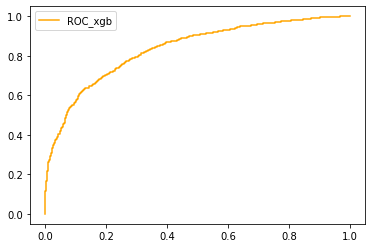

In [21]:
plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC_xgb')
plt.legend(loc=0)

In [22]:
confusion_matrix(y_test, y_pred)

array([[1392,  233],
       [ 454,  805]])